<a href="https://colab.research.google.com/github/Muthunandhini-p/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as ts
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout 
from tensorflow.keras import layers
from keras.utils import to_categorical
plt.style.use('fivethirtyeight')

In [ ]:
from keras.datasets import cifar10

In [ ]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
#check type of the train and test
type(xtrain)

numpy.ndarray

In [ ]:
#check shape of the train and test
xtrain.shape #RGB

(50000, 32, 32, 3)

In [ ]:
#look a first image in array
xtrain[10]#0 to 255

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

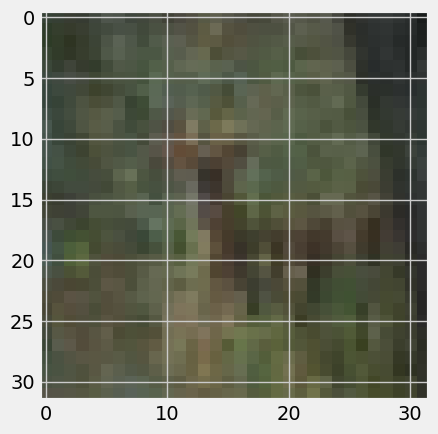

In [ ]:
img0=plt.imshow(xtrain[10])

In [ ]:
lab1=ytrain[10]
print(lab1)

[4]


In [ ]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
print('image class is:',classification[ytrain[10][0]])

image class is: deer


In [ ]:
#change the label into set of numbers [10]
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [ ]:
ytrain_one_hot[10]  #000100000 #000100000

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print('one hot label:',ytrain_one_hot[10])

one hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#normalize the pixels values
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
xtrain[10]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 1000)              8

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=5,validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 79s 501ms/step - loss: 1.7903 - accuracy: 0.3341 - val_loss: 1.5076 - val_accuracy: 0.4503
Epoch 2/5
157/157 [==============================] - 75s 476ms/step - loss: 1.4403 - accuracy: 0.4752 - val_loss: 1.3314 - val_accuracy: 0.5161
Epoch 3/5
157/157 [==============================] - 74s 472ms/step - loss: 1.2865 - accuracy: 0.5369 - val_loss: 1.1884 - val_accuracy: 0.5749
Epoch 4/5
157/157 [==============================] - 73s 467ms/step - loss: 1.1780 - accuracy: 0.5820 - val_loss: 1.1226 - val_accuracy: 0.6065
Epoch 5/5
157/157 [==============================] - 73s 467ms/step - loss: 1.0958 - accuracy: 0.6127 - val_loss: 1.0826 - val_accuracy: 0.6211


In [ ]:
model.evaluate(xtest,ytest_one_hot)

313/313 [==============================] - 5s 17ms/step - loss: 1.0939 - accuracy: 0.6088


[1.0938711166381836, 0.6087999939918518]

In [ ]:
cat=plt.imread('/content/catsample.jpeg')


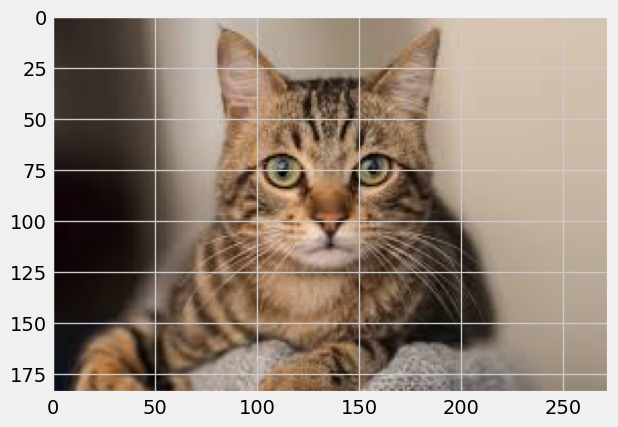

In [ ]:
img=plt.imshow(cat)

In [ ]:
#resize the image
#!pip install scikit-image
from skimage import transform

In [ ]:
resize=transform.resize(cat,(32,32,3))

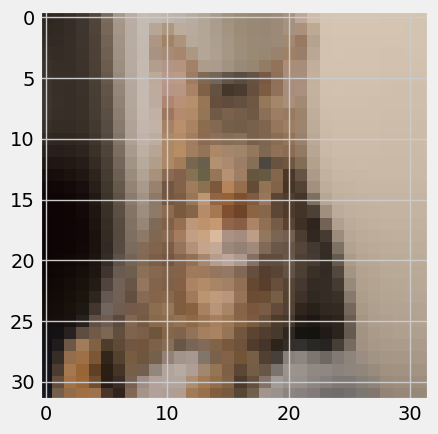

In [ ]:
img=plt.imshow(resize)

In [ ]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 25ms/step
[[1.2065903e-03 2.8243361e-04 6.7628391e-02 5.5636388e-01 3.0699382e-02
  2.5922263e-01 5.6515727e-02 2.1988727e-02 2.7033209e-03 3.3889040e-03]]


In [ ]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[3, 5, 2, 6, 4, 7, 9, 8, 0, 1]


In [ ]:
for i in range(5):
        print(classification[list_index[i]])

cat
dog
bird
frog
deer
